# Imports
This section imports all necessary modules for this model.

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Data Pre-processing
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/discussion?sort=votes

In [121]:
# Load the data
df = pd.read_csv('emails.csv')

# Drop rows with missing values
df = df.dropna(axis=0)

# Drop a specific column, "Email No." if it exists
if 'Email No.' in df.columns:
    df = df.drop(['Email No.'], axis=1)

# Feature and Target Separation
x = df.iloc[:, :-1].values  # Features: all columns except the last
y = df.iloc[:, -1].values    # Target: the last column

# Fit Model

In [122]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=42)

# Initialize Random Forest Classifier
forest = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)
forest.fit(x_train, y_train)

# Make Predictions
y_pred_rf = forest.predict(x_test)


# Display Data

Precision : 0.75
Recall : 1.00
Accuracy Score : 0.90
F1 Score : 0.85


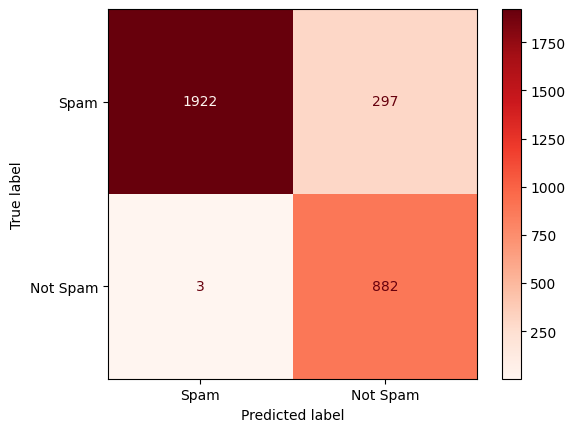

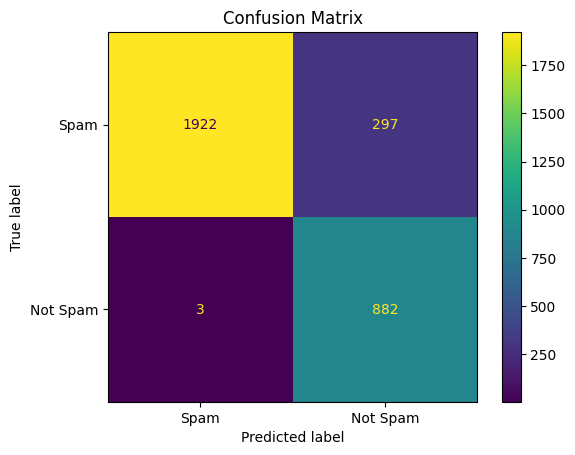

ValueError: ConfusionMatrixDisplay.from_estimator only supports classifiers

In [123]:
# Evaluate Model Performance
print(f"Precision : {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall : {recall_score(y_test, y_pred_rf):.2f}")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score : {f1_score(y_test, y_pred_rf):.2f}")

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Spam', 'Not Spam'], cmap='Reds')
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid with distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],       # Number of trees in the forest
    'max_depth': [5, 10, 20, None],             # Max depth of each tree
    'min_samples_split': [2, 5, 10, 20],        # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],          # Min samples required to be at a leaf node
    'class_weight': ['balanced', None],         # Balanced class weights
    'max_features': ['auto', 'sqrt', 'log2', None],  # Max features to consider
    'random_state': [42]                        # Set random state for reproducibility
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Set up RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the randomized search on the training data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

# Get the best model
best_rf_model_random = random_search.best_estimator_

# Make predictions using the best model
y_pred_rf_random = best_rf_model_random.predict(x_test)

# Print the accuracy score of the best model
from sklearn.metrics import accuracy_score
print(f"Best Model Accuracy Score: {accuracy_score(y_test, y_pred_rf_random):.2f}")